# Installing Required Libraries

In [136]:
!pip install seaborn

### Importing Required Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Importing the dataset

In [140]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filepath, "laptops.csv")
file_name = "laptops.csv"

In [141]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [142]:
download(filepath, "laptops.csv")
file_name = "laptops.csv"

In [143]:
df = pd.read_csv(file_name, header=0)

Examining the dataset

In [145]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0



### Visualizing Individual Feature Patterns



<Axes: xlabel='CPU_frequency', ylabel='Price'>

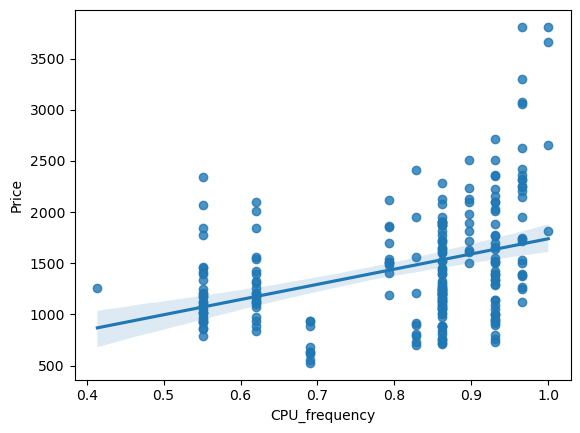

In [147]:
sns.regplot(x="CPU_frequency", y="Price", data=df)

In [148]:
df[['CPU_frequency', 'Price']].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

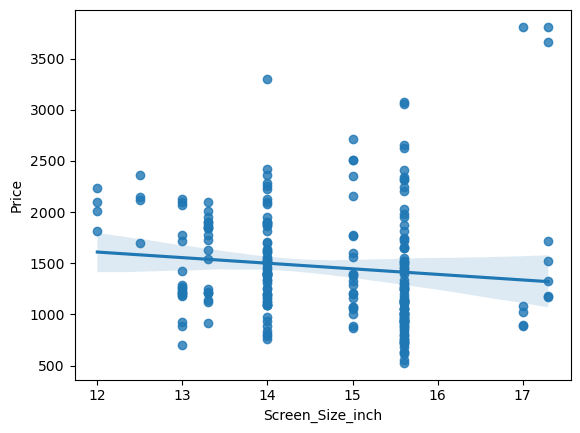

In [149]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

In [150]:
df[['Screen_Size_inch', 'Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


<Axes: xlabel='Weight_pounds', ylabel='Price'>

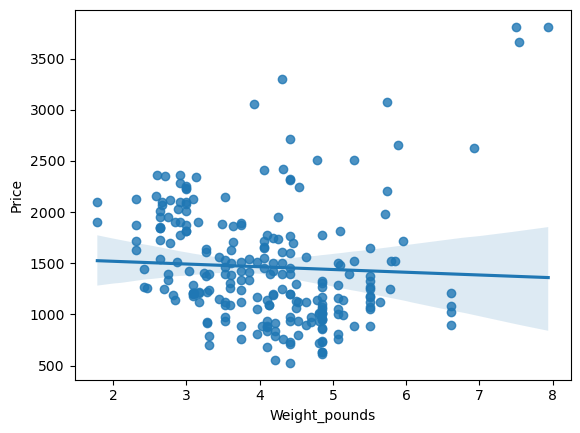

In [151]:
sns.regplot(x='Weight_pounds', y='Price', data=df)

In [152]:
df[['Weight_pounds', 'Price']].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [153]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features

<Axes: xlabel='Category', ylabel='Price'>

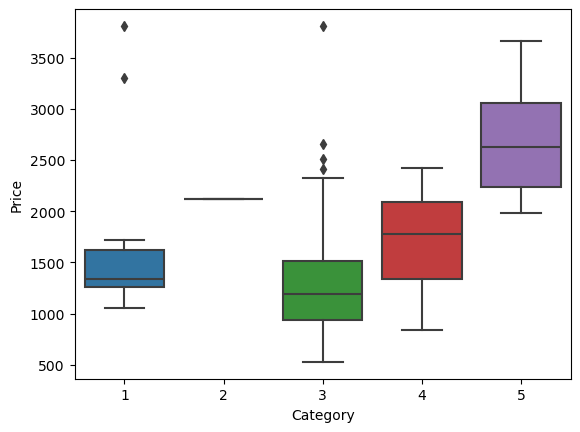

In [156]:
sns.boxplot(x='Category', y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

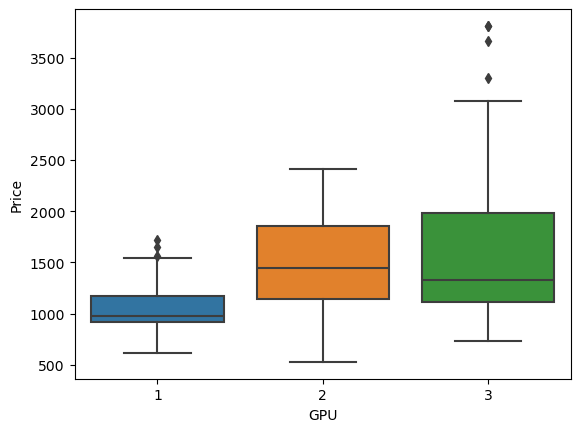

In [157]:
sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

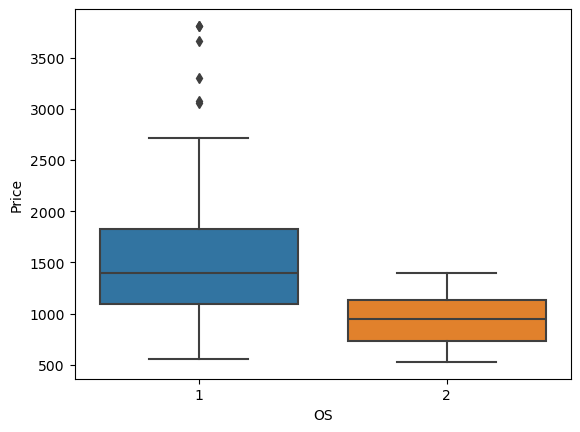

In [158]:
sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

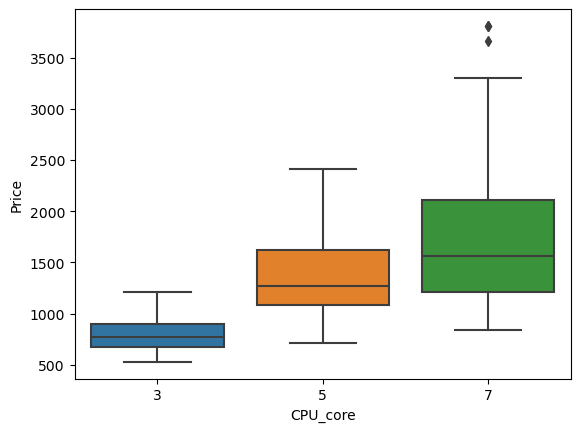

In [159]:
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

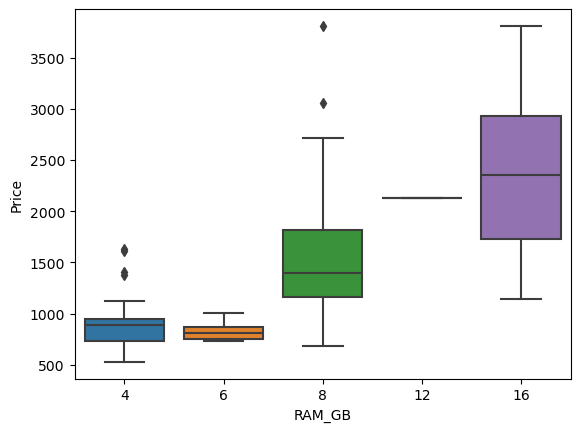

In [160]:
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

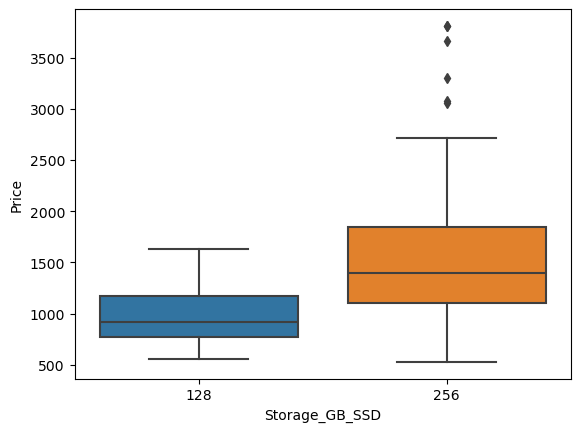

In [161]:
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

### Descriptive Statistical Analysis

Statistical description of all the features being used in the data set.


In [164]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

### Grouping the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize the connection

In [166]:
gp = df[['GPU', 'CPU_core', 'Price']]
group_test = gp.groupby(['GPU', 'CPU_core'],as_index=False).mean()
group_test

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [167]:
grouped_pivot = group_test.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


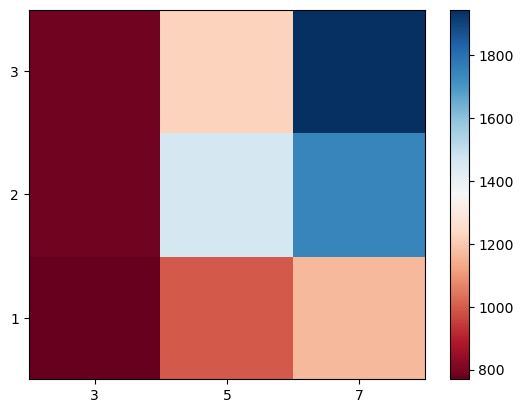

In [168]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

### Evaluating the Pearson Coefficient and the p-values for each parameter tested above

In [170]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118269  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  